<a href="https://colab.research.google.com/github/asadali163/NLP-Transformers/blob/main/codebase/NLP_Translation_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers datasets sentencepiece

In [3]:
# load kde4 data set
# check point = Helsinki-NLP/opus-mt-en-fr

In [4]:
from datasets import load_dataset
data = load_dataset('kde4', lang1='en', lang2='fr')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for kde4 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/kde4.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/210173 [00:00<?, ? examples/s]

In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

As you can see we have only a single collection of data and that composes over 210k sentences. So we randomly select 1000, becuase it will take lot of time to train

In [6]:
small_data = data['train'].shuffle(seed=42).select(range(1_000))

In [7]:
split = small_data.train_test_split(seed=42)

In [8]:
split

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 750
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 250
    })
})

In [9]:
# Now load the tokenizer
from transformers import AutoTokenizer
checkpoint = 'Helsinki-NLP/opus-mt-en-fr'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [10]:
split['train'][0]

{'id': '169005',
 'translation': {'en': '& Reduce Tree', 'fr': "& Refermer l' arborescence"}}

In [11]:
en = split['train'][5]['translation']['en']
fr = split['train'][5]['translation']['fr']

In [12]:
en, fr

('You can either pick a file or enter its name in the Location: box.',
 'Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.')

In [13]:
# Let's tokenized the en and fr sentence
tokenized_en = tokenizer(en)
tokenized_en

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [14]:
tokenized_fr = tokenizer(fr, as_target_tokenizer=True)
tokenized_fr

Keyword arguments {'as_target_tokenizer': True} not recognized.


{'input_ids': [461, 2130, 5909, 6020, 590, 239, 567, 9071, 900, 1248, 34, 5094, 3534, 108, 239, 567, 62, 1794, 1248, 113, 170, 122, 31, 8, 1283, 5, 1863, 51, 9831, 35646, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [15]:
# Let's check whether our target tokenized correctly or not
tokenizer.convert_ids_to_tokens(tokenized_fr['input_ids']) # If the new word not start with __, then it is wrongly tokenized.

['▁V',
 'ous',
 '▁po',
 'uv',
 'ez',
 '▁so',
 'it',
 '▁cho',
 'is',
 'ir',
 '▁un',
 '▁fi',
 'chi',
 'er',
 '▁so',
 'it',
 '▁s',
 'ais',
 'ir',
 '▁son',
 '▁no',
 'm',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁text',
 'e',
 '▁Em',
 'placement',
 '.',
 '</s>']

As you can see it is wrongly tokenized. Let's do in correct way.

In [16]:
encoded = tokenizer(en, text_target=fr)

In [17]:
encoded

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [344, 1069, 345, 4094, 34, 2428, 345, 9315, 113, 689, 31, 8, 1283, 5, 1470, 21708, 3, 0]}

In [18]:
tokenizer.convert_ids_to_tokens(encoded['labels'])

['▁Vous',
 '▁pouvez',
 '▁soit',
 '▁choisir',
 '▁un',
 '▁fichier',
 '▁soit',
 '▁saisir',
 '▁son',
 '▁nom',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁texte',
 '▁Emplacement',
 '.',
 '</s>']

As you can see, each word start with new __, so this is the correct way of doing things

As the inputs and targets has different length, We have to truncate it to some lenght, so for that we need to draw the histogram of lenght of inputs and targets sentences

In [19]:
import matplotlib.pyplot as plt

In [20]:
train = split['train']['translation']
inputs = [len(tr['en']) for tr in train]
targets = [len(tr['fr']) for tr in train]

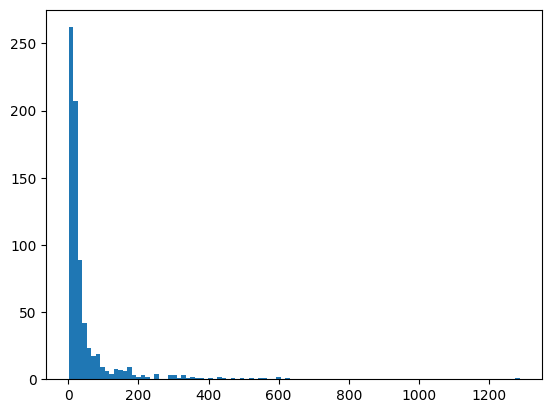

In [21]:
# Input and Target histogram
plt.hist(inputs, bins=100, label='Input')
plt.show();

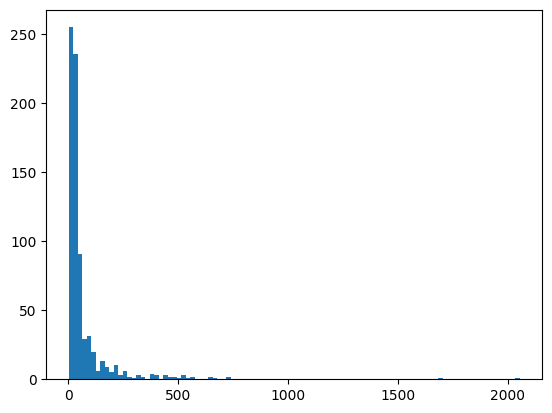

In [22]:
plt.hist(targets, bins=100, label='Target')
plt.show();

As both have the same common length of about 120-140. We will ignore the outliers.

In [23]:
max_input_length = 128
max_target_length = 128

Now let's define the function for batch tokenization

In [24]:
def tokenize_function(examples):
  inputs = [ex['en'] for ex in examples['translation']]
  targets = [ex['fr'] for ex in examples['translation']]

  tokenized_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

  with tokenizer.as_target_tokenizer():
    tokenized_targets = tokenizer(targets, max_length=max_target_length, truncation=True)

  tokenized_inputs['labels'] = tokenized_targets['input_ids']

  return tokenized_inputs

In [25]:
tokenized_dataset = split.map(tokenize_function, batched=True, remove_columns=split['train'].column_names)

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [26]:
from transformers import AutoModelForSeq2SeqLM

In [27]:
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
from transformers import DataCollatorForSeq2Seq

In [29]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [30]:
[tokenized_dataset['train'][i] for i in range(1, 3)]

[{'input_ids': [526, 3261, 0],
  'attention_mask': [1, 1, 1],
  'labels': [526, 3261, 0]},
 {'input_ids': [3492,
   3070,
   6443,
   37,
   443,
   61,
   32,
   317,
   2203,
   4824,
   514,
   1807,
   971,
   4,
   4124,
   3,
   0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [34023,
   5,
   3948,
   5,
   372,
   402,
   38492,
   350,
   823,
   95,
   13439,
   2,
   25985,
   14,
   6,
   3996,
   3,
   0]}]

In [31]:
batch = data_collator([tokenized_dataset['train'][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

As you can see thae decoder_input_ids is added by collator, this is becuase of seq 2 seq model accept the output from previous step as input to current step in decoder part

In [32]:
batch

{'input_ids': tensor([[  526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513],
        [ 3492,  3070,  6443,    37,   443,    61,    32,   317,  2203,  4824,
           514,  1807,   971,     4,  4124,     3,     0]]), 'attention_mask': tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([[  526,  3261,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100],
        [34023,     5,  3948,     5,   372,   402, 38492,   350,   823,    95,
         13439,     2, 25985,    14,     6,  3996,     3,     0]]), 'decoder_input_ids': tensor([[59513,   526,  3261,     0, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513],
        [59513, 34023,     5,  3948,     5,   372,   402, 38492,   350,   823,
            95, 134

As you can see that the decoder_input_ids are the shifted version of the input_ids

In [33]:
tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0])

['<pad>',
 '▁K',
 'DE',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>']

The <pad> is token to be ignored

Now For the metrices, we will use BLUE score and BERT score.

In [34]:
!pip install sacrebleu bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [35]:
from datasets import load_metric

In [36]:
bleu_score = load_metric('sacrebleu')
bert_score = load_metric('bertscore')

<ipython-input-36-feeccbdac549>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_score = load_metric('sacrebleu')


The repository for sacrebleu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sacrebleu.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


The repository for bertscore contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bertscore.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [37]:
bleu_score.compute(predictions=['The cat run.'], references=[['The cat run.']])

{'score': 100.00000000000004,
 'counts': [4, 3, 2, 1],
 'totals': [4, 3, 2, 1],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 4,
 'ref_len': 4}

In [38]:
bert_score.compute(predictions=['The cat run.'], references=[['The cat run.']], lang='en')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [1.0],
 'recall': [1.0],
 'f1': [1.0],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.42.4)'}

The BLEU score compare the n-grams, which don't care if 2 words has same contextual meaning. So the BERT score is more accurate criteria as it compare the cosine similarity of 2 words

In [39]:
import numpy as np

In [54]:
def compute_metrics(pred_and_labels):
  preds, labels = pred_and_labels

  # convert prediction into words.
  decode_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

  labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

  # convert label into words
  decode_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  decode_preds = [pred.strip() for pred in decode_preds]
  decode_labels = [[label.strip()] for label in decode_labels]

  bleu_scoree = bleu_score.compute(predictions=decode_preds, references=decode_labels)
  bert_scoree = bert_score.compute(predictions=decode_preds, references=decode_labels, lang='en')

  return {"bleu": bleu_scoree['score'], 'bert_score': np.mean(bert_scoree['f1'])}

In [55]:
from transformers import Seq2SeqTrainingArguments

In [56]:
training_args = Seq2SeqTrainingArguments(
    'finetuned_model',
    evaluation_strategy='no',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [57]:
from transformers import Seq2SeqTrainer

In [58]:
trainer = Seq2SeqTrainer(
    model,
    training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [59]:
# Let's check our metrics before start
trainer.evaluate(max_length=max_target_length)

{'eval_loss': 1.5956109762191772,
 'eval_bleu': 38.89561045764889,
 'eval_bert_score': 0.9191253373622894,
 'eval_runtime': 21.8041,
 'eval_samples_per_second': 11.466,
 'eval_steps_per_second': 0.183}

In [60]:
trainer.train()

Step,Training Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strate

TrainOutput(global_step=72, training_loss=1.514641973707411, metrics={'train_runtime': 48.7853, 'train_samples_per_second': 46.12, 'train_steps_per_second': 1.476, 'total_flos': 51206128533504.0, 'train_loss': 1.514641973707411, 'epoch': 3.0})

In [61]:
# let's save model
trainer.save_model('my_saved_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[59513]], 'forced_eos_token_id': 0}


In [63]:
# Le't load model
from transformers import pipeline

In [65]:
translator = pipeline('translation', model='my_saved_model', device=0)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [66]:
translator('I love you')

[{'translation_text': "Je t'aime."}]